# meng 21200 pset 5

### init

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.integrate import solve_ivp

pi = np.pi
e = np.exp(1)

### problem 1

In [315]:
L = 0.2
g = 9.81
y0 = np.array([0.05, 0])
t0 = 0
dt = 0.01
t_end = 10

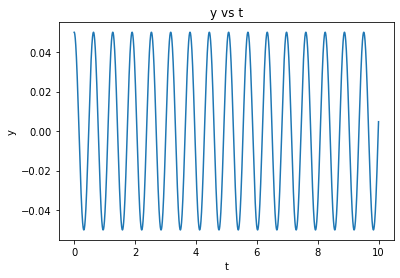

Text(0.5, 1.0, 'dy/dt vs t')

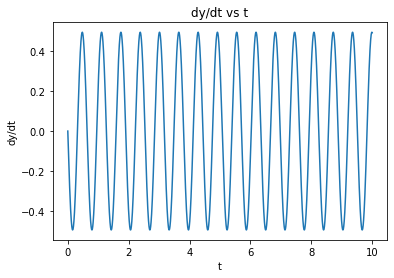

In [316]:
def f(y, t):
    return np.array([y[1], -2 * 9.81 * y[0] / L])

def rk(y, t, dt):
    k1 = dt * f(y, t)
    k2 = dt * f(y + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * f(y + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * f(y + k3, t + dt)

    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6


L = 0.2
y = np.array([0.05, 0])
t = 0
dt = 0.001

tlist = [0]
ylist = [y]

while t < 10:
    t += dt
    y = rk(y, t, dt)
    tlist.append(t)
    ylist.append(y)

plt.plot(tlist, np.array(ylist)[:, 0])
plt.xlabel('t')
plt.ylabel('y')
plt.title('y vs t')
plt.show()

plt.plot(tlist, np.array(ylist)[:, 1])
plt.xlabel('t')
plt.ylabel("dy/dt")
plt.title('dy/dt vs t')

### problem 2

In [317]:
a = 20
b = 30
c = 150
d = 100
dt = 0.01
step = 0.01
max_step = 100000
tol = 0.1

a

initial conditions: cat's speed and initial position, dog's speed and initial position, tree's inital position

b

Text(0, 0.5, 'y')

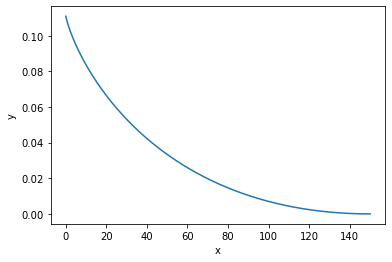

In [318]:
x = c
y = 0.1

def f(t, v):
    return [-b * ((1 + (v[2] ** 2)) ** -0.5), v[2], (a / (b * v[0])) * ((1 + (v[2] ** 2)) ** 0.5)]

ans = solve_ivp(f, (0, 5), [c, 0, 0], max_step=step)
plt.plot(ans.y[0], ans.y[1])
plt.xlabel('x')
plt.ylabel('y')

c

In [319]:
dist = ans.t[-1] * a
print(f'max distance: {round(dist, 2)}')

max distance: 100.0


d

dog must be faster than cat to catch it

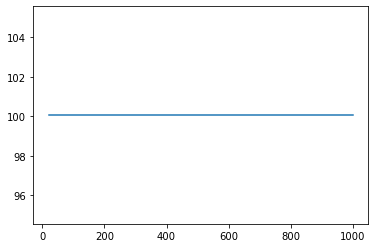

In [320]:
vlist = np.linspace(20.1, 1000)
ylist = []
for v in vlist:
    b = v
    ans = solve_ivp(f, (0, 5.003), [c, 0, 0], max_step=step)
    dist = ans.t[-1] * a
    ylist.append(dist)
plt.plot(vlist, ylist)

f

yes, this behaviour is seen in large mammals such as lions and cheetahs

### problem 3 - Comparison of stiffness and stability behavior

$Adapted from https://www.mathworks.com/company/newsletters/articles/stiff-differential-equations.html$

Stiffness is a subtle, complicated, but important concept in the numerical solution of ordinary differential equations.

An ordinary differential equation problem is stiff if the solution being sought is varying slowly, but there are nearby solutions that vary rapidly, so the numerical method must take small steps to obtain satisfactory results.

A model of flame propagation from O'Malley (1991) and Shampine et al. (2003) provides an example. When you light a match, the ball of flame grows rapidly until it reaches a critical size. Then it remains at that size because the amount of oxygen being consumed by the combustion in the interior of the ball balances the amount available through the surface. The simple model is
$$\frac{dy}{dt}=y^2(1-y)$$
$$y(0)=\delta$$
$$0<t<\frac{2}{\delta}$$

The scalar variable $y(t)$  represents the radius of the ball. The $y^2$ and $y^3$ terms come from the surface area and the volume. The critical parameter is the initial radius, $\delta$, which is "small." We seek the solution over a length of time that is inversely proportional to $\delta$.

(a) Try $\delta = 0.5$. Choose appropriate method and step size. Plot $y(t)$ and $\frac{dy}{dt}$ in the same figure.

(b) Try $\delta = 2$. Choose appropriate method and step size. Plot $y(t)$ and $\frac{dy}{dt}$ in the same figure.

(c) Now try $\delta = 0.001$. Choose an appropriate method and step size. Plot $y(t)$ and $\frac{dy}{dt}$ in the same figure. Compared with your result from part (a), what is the difference?

(d) Now create a graph that provides a zoomed in view to the solution of y versus t for y between 0.998 and 1.002.  To your plot, add the solutions achieved using the RK23, RK45, DOP853, Radau, LSODA, and BDF methods from the scipy.integrate library.  

What do you observe?  Which methods work best?  Why?

(e) For each of the methods that you compared in part (d), determine (i) the number of steps taken and (ii) the CPU time for the integration.  Is the computational efficiency of the library methods correlated with their ability to accurately solve stiff ODEs?

### problem 4 - Application of implicit methods for solving IVPs
#### The implicit Euler method is unconditionally stable. Let's explore this further under different situations.

(a) Given the non-linear ODE $$\frac{dy}{dt}=30(cos(t)-y)+3sin(t)$$

If y(0) = 1, use the implicit Euler method to obtain a solution from t = 0 to 4 using a step size of 0.4.


(b) Given the non-linear ODE $$\frac{dy}{dt}=30(cos(t)-y^2)+3sin(t)$$

If y(0) = 1, use the implicit Euler method to obtain a solution from t = 0 to 4 using a step size of 0.4.


(c) Given a higher-order of ODE $$\frac{d^2y}{dx^2}=-1001\frac{dy}{dx}-1000y$$

If y(0) = 1 and y'(0) = 0, use the implicit Euler approach with h = 0.5 to solve for x = 0 to 5.

(d) For each of the prior examples, solve the ODEs using the explicit Euler method with the same step size.  Are the solutions stable?  What is the critical step size at which the explicit Euler method transitions from being stable to unstable?   

### problem 5

### problem 6

a

we start with the original ODE:
$$\frac{d^2y}{dx^2} + x\frac{dy}{dx} + y = 6x$$
note that
$$\frac{dy}{dx} = \frac{y_{i+1} - y_{i-1}}{2h}$$
and
$$\frac{d^2y}{dx^2} = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}$$
substitute the expressions for $\frac{dy}{dx}$ and $\frac{d^2y}{dx^2}$ into the original ODE:
$$\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + x_i\frac{y_{i+1} - y_{i-1}}{2h} + y_i = 6x_i$$
converting into form $Ay_{i+1} + By_i + Cy_{i-1} = 6x_i$:
$$A = \frac{1}{h^2} - \frac{x_i}{2h}, B = 1 - \frac{2}{h^2}, C = \frac{1}{h^2} + \frac{x_i}{2h}$$
we can now solve this linear system with boundary conditions $\frac{dy(0)}{dx} = -1$ and $y(1) = 1$.

In [321]:
# initialise values
n = 100
h = 1 / n
xlist = np.linspace(0, 1, n + 1)

A = 1 / (h ** 2) - xlist / (2 * h)
B = 1 - 2 / h ** 2
C = 1 / (h ** 2) + xlist / (2 * h)

matrix = np.zeros((n + 1, n + 1))
matrix[0, 0] = B
matrix[0, 1] = A[0] + B
matrix[n, n] = 1

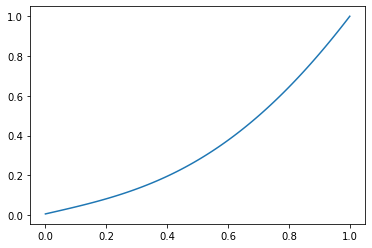

In [322]:
# populate matrix
for i in range(1, n):
    matrix[i, i - 1] = A[i - 1]
    matrix[i, i] = B
    matrix[i, i + 1] = C[i + 1]

# make list of xi
vector = np.array([6 * xlist[i] for i in range(n + 1)])
vector[0] -= 2 * h * A[0]
vector[n] = 1

ylist = np.linalg.solve(matrix, vector)
plt.plot(xlist, ylist)

an attempt was made, but this is clearly wrong

b

let $y_1 = y$ and $y_2 = \frac{dy}{dx}$
rewrite original ODE as a system accordingly

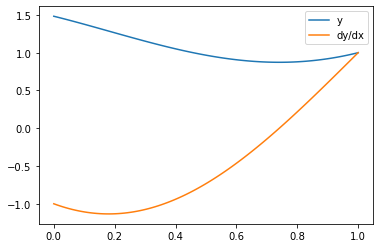

In [323]:
def stack(x, y):
    return np.vstack([y[1], 6 * x - y[0] - x * y[1]])
def bounds(y1, y2):
    return np.array([y1[1] + 1, y2[0] - 1])

n = 100
xlist = np.linspace(0, 1, n)
y1 = np.zeros((2, n))
y2 = np.zeros((2, n))

ylist = solve_bvp(stack, bounds, xlist, y1)
plt.plot(xlist, ylist.sol(xlist)[0], label='y')
plt.plot(xlist, ylist.sol(xlist)[1], label='dy/dx')
plt.legend()